## 통신사 고객 데이터에 따른 고객 이탈 예측하기

In [1]:
import pandas as pd

df = pd.read_csv("test3.csv") # https://community.ibm.com/accelerators/
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Business Understanding
- 통신사 고객 관리
- 고객과의 약정을 통해 정기적인 현금 흐름을 만들어냄
- 고객 인원 수가 중요해보임 -> 신규고객 유치, 기존 고객 이탈을 방지

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.sort_values(by = 'tenure')['tenure']

1340     0
936      0
6670     0
4380     0
5218     0
        ..
914     72
917     72
4574    72
3635    72
3543    72
Name: tenure, Length: 7043, dtype: int64

#### 빈 값 처리 방법
1. 그냥 지운다. ( 비추 )
2. 도메인 지식을 이용해 채워넣기
3. 평균 대체법
4. 해당 column을 label로 두고, 모델을 학습시켜서 예측값으로 빈 값 채우기

In [5]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))
df['Churn_num'] = df['Churn'].map({'Yes' : 1, 'No' : 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


#### 이상치 ( Outlier )
- 기준을 정해서 기준선 밖에 있으면 이상치로 판단

#### 기준을 정하는 방법
- IQR 
- MAD
- MCOD

### 식별된 이상치가 있는 경우 대처법
- 경우의 수가 적으면 지움
- 경계 값으로 대체( Winsorize )
- Business understanding에서 설정한 방향성이 이상치 탐지인 경우 -> label


#### IQR ( Inter Quartile Range )
- Range를 벗어나면 이상치로 판단 

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [7]:
desc = df.describe()['TotalCharges']
desc

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
IQR =  (desc['75%'] - desc['25%']) * 1.5 # 1.5 * IQR
upper_lim = desc['75%'] + IQR
lower_lim = desc['25%'] - IQR

In [9]:
df.loc[(df['TotalCharges'] > upper_lim) | (df['TotalCharges'] < lower_lim)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [10]:
import matplotlib.pyplot as plt 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a316769df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a3167893d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a316769b20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a316789970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a316789c40>],
 'means': []}

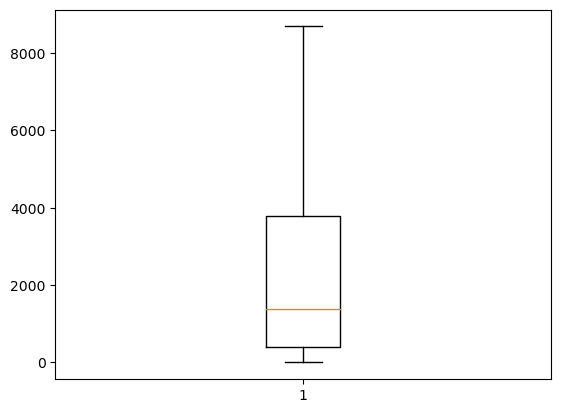

In [11]:
plt.boxplot(df['TotalCharges'])

#### Scaling
- 자릿수가 작아야 속도가 빠르다
- 학습에 영향을 끼치는 자료가 존재한다.

#### 스케일링 종류
- min-max 스케일링 : x로 빼고, x로 나눠주면 된다. 순서대로 해야한다.  최소는 0으로 최대는 1로 만들어주는 방법
- standard : 평균을 1로, 표준편차를 0으로 만들어주는 방법
- robust : 중간값과 IQR을 사용한다. MEDIAN = 0, IQR = 1로 만들어줘야한다. 
- 이상치에 미치는 영향도 : min-max > standard > robust 

In [12]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

In [13]:
import numpy as np

# min-max

minus_min = df['tenure'] - np.min(df['tenure'])
scaled = minus_min / np.max(minus_min)
df['tenure_scaled'] = scaled
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scaled
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000


In [14]:
# standard scaling

minus_min = df['MonthlyCharges'] - np.mean(df['MonthlyCharges'])
df['MonthlyCharges_scaled'] = minus_min / np.std(minus_min)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scaled,MonthlyCharges_scaled
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,-1.513422e-15
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,1.000071e+00
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,-1.545860e+00
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,-9.725399e-01
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,1.857327e-01
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,8.338335e-01
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.794352e+00


#### 경우의 수 columns 변환과정

In [15]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [16]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for tgt in yes_no_cols:
    mapper = {'No' : 0, 'Yes' : 1}
    df[tgt+ '_num'] = df[tgt].map(mapper)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,Churn_num,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0,0.013889,-1.160323,1,0,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,0,0.472222,-0.259629,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,1,0.027778,-0.362660,0,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,0,0.625000,-0.746535,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,1,0.027778,0.197365,0,0,1,1


In [17]:
mapper = {'No' : 0, 'DSL' : 0.5, 'Fiber optic' : 1}
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_scaled,MonthlyCharges_scaled,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,-1.513422e-15,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,1.000071e+00,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,-1.545860e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,-9.725399e-01,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,1.857327e-01,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,8.338335e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.794352e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_num', 'tenure_scaled', 'MonthlyCharges_scaled', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed'],
      dtype='object')

In [19]:
interested = ['SeniorCitizen', 'TotalCharges',
       'Churn_num', 'tenure_scaled', 'MonthlyCharges_scaled', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed']
df[interested].to_csv('test3_modify.csv', index = False)

In [20]:
df = pd.read_csv('test3_modify.csv')
df.columns

Index(['SeniorCitizen', 'TotalCharges', 'Churn_num', 'tenure_scaled',
       'MonthlyCharges_scaled', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [21]:
label = 'Churn_num'
features = ['SeniorCitizen', 'TotalCharges', 'tenure_scaled',
       'MonthlyCharges_scaled', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']

X, y= df[features], df[label]

## 교차검증 (Cross-Validation)
- 안정적인 학습 방법

1. row의 순서를 섞는다. shuffle
2. 데이터 셋을 k등분 (k - fold)
3. 첫번째 셋을 테스트, 나머지를 트레인 -> 예시 
4. train 데이터로 학습하고, test 데이터로 채점해서 점수 확인
5. 두 번 째 데이터셋을 테스트, 나머지를 트레인 -> 예시
6. 평가지표 점수가 k개 생김 -> 평균(cv-score)

In [22]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf

In [23]:
model = rf()

In [24]:
np.mean(cvs(model, X, y, scoring = 'precision', cv = 5))

0.5875595667616789

#### 군집 알고리즘

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=4).fit(X)

In [27]:
kmeans.labels_

array([0, 2, 0, ..., 0, 0, 1])